In [ ]:
# Motivation

# PyMC is a python module that implements Bayesian statistical models and fitting algorithms, including Markov 
# chain Monte Carlo. Its flexibility and extensibility make it easier to be applicable to a large suite of problems. 
# Along with the core sampling functionality, PyMC includes methods for summarizing output, plotting, goodness-of-fit, 
# and convergence diagnostics

In [ ]:
# Context

# There are multiple libraries for Machine Learning in Python. Most common ones are: scikit-learn, Theano, Pylearn2, 
# Shogun, and Caffe among others.

# Scikit-learn is developed on top of NumPy, SciPy, and matplotlib libraries, so it'll have a familiar feel to it 
# for the many people that already use these libraries.

# Theano allows the users to define, optimize, and evaluate mathematical expressions and use multidimensional arrays to solve.
# Theano (like scikit-learn) also integrates with NumPy and it's used more commonly for research purposes rather than 
# development purpose. 

# PyLearn2 is built on top of Theano. It also wraps libraries like scikit-learn and this limits the usability of completely 
# custom-written code. Though with the wrapping of other libraries, PyLearn2 gets more and more flexible, but at the same time
# it gets dependent too.

# Caffe is a library specific to the machine learning in vision applications. It could be used to create deep neural 
# networks that recognize the objects visually. Again, this makes the library more usable for academics and research purpose 
# and less for production. 

# Shogun is developed in C++. This makes it a lot flexible, faster, and easy to be integrated with
# multiple data representations and algorithm classes. Very large datasets can be handled very efficiently with Shogun. 
# But installing Shogun is a tedious task and for beginners, it becomes even more difficult and the learning curve is steep. 


# PyMC, on the other hand, is robust, easy to install and use. With a lot of resources and documentation around the 
# implementation of the models, PyMC is preferred by majority of developers. 
# Following are the main features of PyMC:
# 1) Includes a large suite of well-documented statistical distributions
# 2) Includes a module for modeling Gaussian processes
# 3) Sampling loops can be paused and tuned manually, or saved and restarted later
# 4) Creates summaries including tables and plots.

In [ ]:
# Installation instructions, platform restriction and dependent libraries

# Ready to install packages are available to install PyMC for Anaconda, Linux, Mac, Windows, and Github

# Anaconda
conda install -c https://conda.binstar.org/pymc pymc
    
# Windows
# Download the Automated MinGW Installer. Install MSYS-1.0.exe. Type below command on the command prompt:
python setup.py install

# Mac/ Linux
python setup.py config_fc --fcompiler gfortran build
python setup.py install

# Github
git clone git://github.com/pymc-devs/pymc.git
    

# Requirements and dependent libraries

# There are some prerequisite packages for PyMC:
# 1. Python version 2.6 or later
# 2. NumPy (1.6 or newer)
# 3. Matplotlib
# Rest of the packages are optional and are usually called when needed


In [ ]:
# Minimal working example

In [37]:
# Below example implements MCMC model using Binomial distribution. PyMC makes it really efficient and easy to implement
# MCMC model which otherwise would have required very complex code and more computational overhead to be implemented.

# Import relevant modules
import pymc
import numpy as np

# Some data
n = 5*np.ones(4,dtype=int)
x = np.array([-.86,-.3,-.05,.73])

# Priors on unknown parameters
alpha = pymc.Normal('alpha',mu=0,tau=.01)
beta = pymc.Normal('beta',mu=0,tau=.01)

# Arbitrary deterministic function of parameters
@pymc.deterministic
def theta(a=alpha, b=beta):
    """theta = logit^{-1}(a+b)"""
    return pymc.invlogit(a+b*x)

# Binomial likelihood for data
d = pymc.Binomial('d', n=n, p=theta, value=np.array([0.,1.,3.,5.]),\
                  observed=True)


 [-----------------100%-----------------] 10000 of 10000 complete in 3.8 secPlotting beta
Plotting alpha
Plotting theta_0
Plotting theta_1
Plotting theta_2
Plotting theta_3


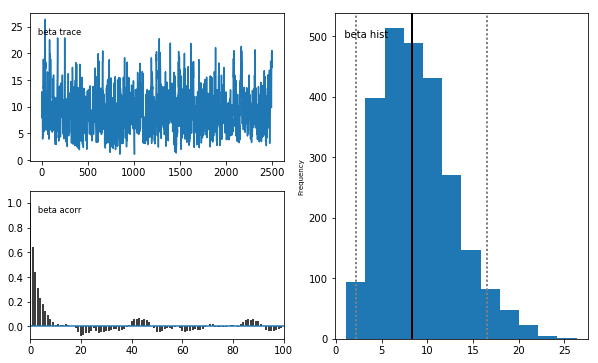

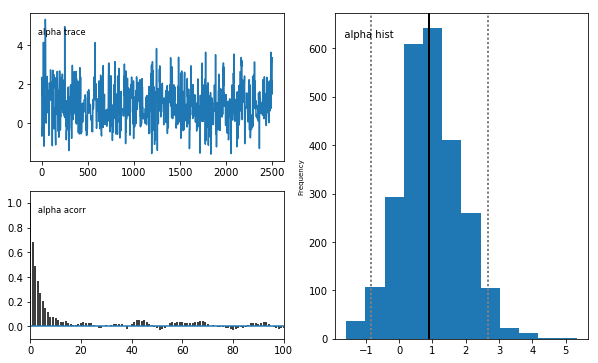

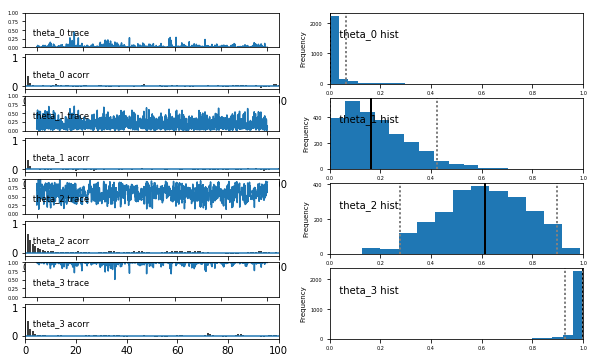

In [38]:
# Implementing and plotting the MCMC model 

S = pymc.MCMC([n,x,alpha,beta,theta], db='pickle')
S.sample(iter=10000, burn=5000, thin=2)
pymc.Matplot.plot(S)

In [ ]:
# First use case

# Explain the Linear regression model with two predictor variables (x,y) and one outcome variable (z). 
# The relation between them is: 
# Z = (alpha) + (beta_x.x) + (beta_y.y) + (epsilon) 
# where epsilon is a Gaussian noise term

In [39]:
from numpy import *
Nobs = 20
x_true = random.uniform(0,10, size=Nobs)
y_true = random.uniform(-1,1, size=Nobs)
alpha_true = 0.5
beta_x_true = 1.0
beta_y_true = 10.0
eps_true = 0.5
z_true = alpha_true + beta_x_true*x_true + beta_y_true*y_true
z_obs = z_true + random.normal(0, eps_true, size=Nobs)

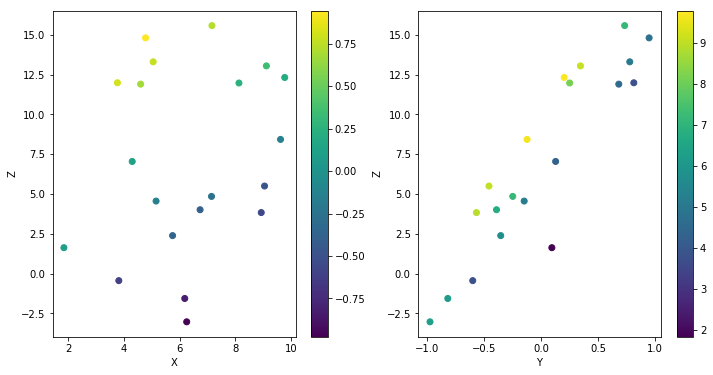

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x_true, z_obs, c=y_true, marker='o')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Z')
plt.subplot(1,2,2)
plt.scatter(y_true, z_obs, c=x_true, marker='o')
plt.colorbar()
plt.xlabel('Y')
plt.ylabel('Z')

In [41]:
import pymc
# define the parameters with their associated priors
alpha = pymc.Uniform('alpha', -100,100, value=median(z_obs))
betax = pymc.Uniform('betax', -100,100, value=std(z_obs)/std(x_true))
betay = pymc.Uniform('betay', -100,100, value=std(z_obs)/std(y_true))
eps = pymc.Uniform('eps', 0, 100, value=0.01)

# Now define the model
@pymc.deterministic
def model(alpha=alpha, betax=betax, betay=betay, x=x_true, y=y_true):
    return alpha + betax*x + betay*y

# pymc parametrizes the width of the normal distribution by tau=1/sigma**2
@pymc.deterministic
def tau(eps=eps):
    return power(eps, -2)

# Lastly relate the model/parameters to the data
data = pymc.Normal('data', mu=model, tau=tau, value=z_obs, observed=True)

In [42]:
# Implementing the MCMC model

sampler = pymc.MCMC([alpha,betax,betay,eps,model,tau,z_obs,x_true,y_true])
sampler.use_step_method(pymc.AdaptiveMetropolis, [alpha,betax,betay,eps],
                        scales={alpha:0.1, betax:0.1, betay:1.0, eps:0.1})
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 6.6 sec

Plotting betay
Plotting betax
Plotting eps
Plotting alpha
Plotting tau


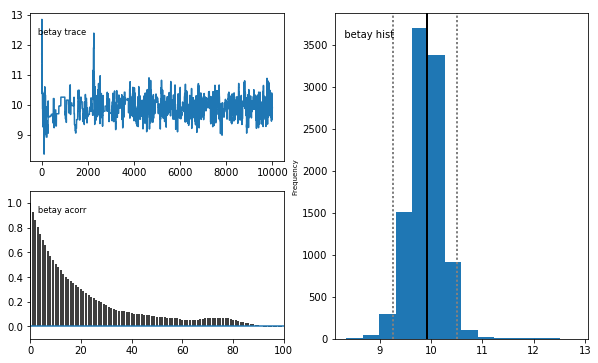

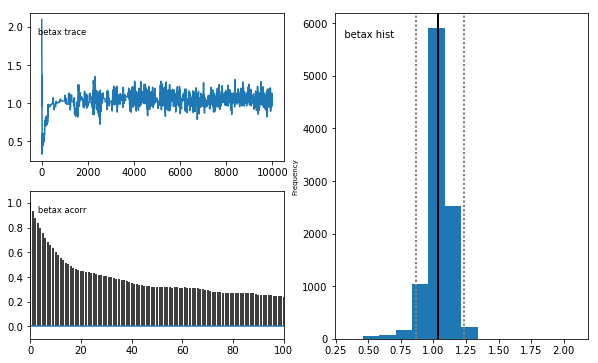

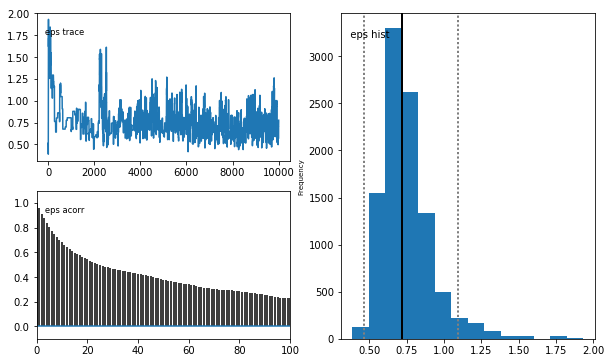

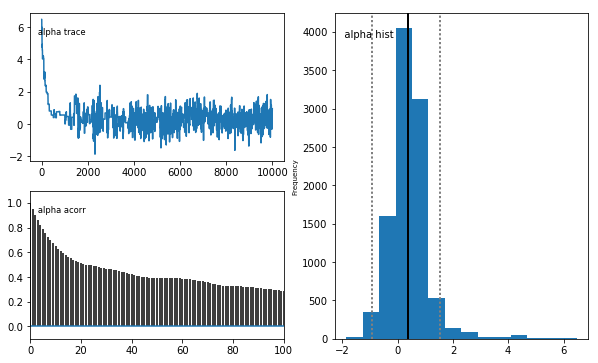

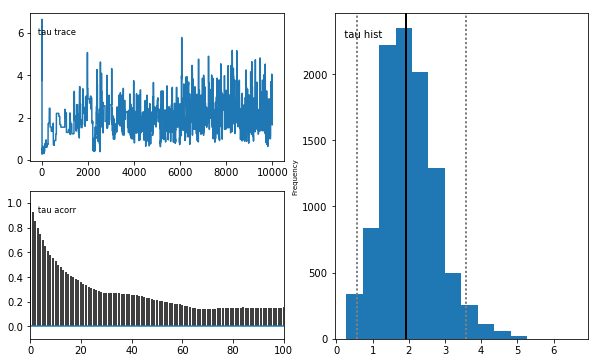

In [43]:
# Plotting the model

pymc.Matplot.plot(sampler)

In [ ]:
# Second use case

# Below example explains how to fit a fixed effects Poisson model with PyMC

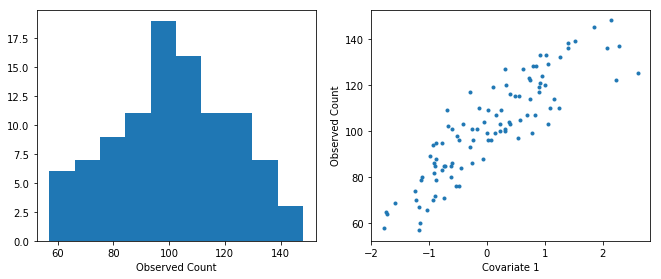

In [52]:
# Importing libraries
import pylab as pl
import pymc as mc
import pandas

# Simulating data with known distribution
N = 100
X = pandas.DataFrame({'constant': pl.ones(N), 'cov_1': pl.randn(N)})

beta_true = pandas.Series(dict(constant=100., cov_1=20.))
mu_true = pl.dot(X, beta_true)

Y = mc.rpoisson(mu_true)

# Exploring the data graphically
pl.figure(figsize=(11,4.25))

pl.subplot(1,2,1)
pl.hist(Y)
pl.xlabel('Observed Count')

pl.subplot(1,2,2)
pl.plot(X['cov_1'], Y, '.')
pl.xlabel('Covariate 1')
pl.ylabel('Observed Count')


# Data representation in bar plot and scatter plot to visualize the distribution
beta = mc.Uninformative('beta', value=[Y.mean(), 0.])
mu_pred = mc.Lambda('mu_pred', lambda beta=beta, X=X: pl.dot(X, beta))
Y_obs = mc.Poisson('Y_obs', mu=mu_pred, value=Y, observed=True)


Wall time: 3.58 s
Plotting beta_0
Plotting beta_1

true value of beta
 constant    100.0
cov_1        20.0
dtype: float64

predicted:
         mean          lb         ub
0  100.245544   98.317371  18.530879
1   20.292463  102.114444  22.337394


C:\Users\shash\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


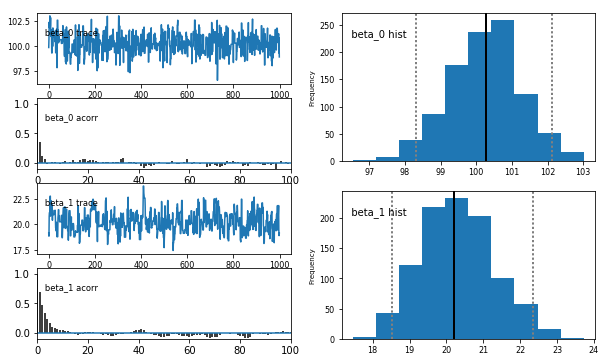

In [54]:
# Sampling and plotting the Markov Chain Monte Carlo model to estimate the approximations for Bayesian parameter
# Following graphs that are displayed show high convergence in the beta_0 and beta_1 trace plots. This implies
# there is less auto-correlation in the variates. This could be attributed to the approximation

m = mc.Model([beta, mu_pred, Y_obs])
%time mc.MCMC(m).sample(10000, 5000, 5, progress_bar=False)
mc.Matplot.plot(beta, common_scale=False)
print ('\ntrue value of beta\n', beta_true)
print ('\npredicted:')
print (pandas.DataFrame({'mean':beta.stats()['mean'],
                        'lb':beta.stats()['95% HPD interval'][:,0],
                        'ub':beta.stats()['95% HPD interval'][:,1]},
                       columns=['mean','lb','ub']))


In [ ]:
# Additional Features

# With PyMC, we are able to break the models into components and reuse those components. 
# Also, PyMC is not an entire package. Instead, it's a library. Thus, it gets easier for a user to use it in 
# conjugation with other systems (file-reading, graphing, output, further data-analysis, etc). This makes PyMC a lot more
# flexible as compared to the other machine learning libraries.

# The developers have released PyMC 3 that features an expanded set of MCMC samplers, including Hamiltonian Monte Carlo. 
# They have integrated PyMC with Theano to provide automatic evaluation of mathematical expressions, including gradients 
# used by modern MCMC samplers. It also features benefits like intuitive model specification syntax and 
# transparent support for missing value imputation. All these enhancements make the library more flexible and extensible.


In [ ]:
# Summary

# MCMC is a surprisingly difficult and bug-prone algorithm to implement by hand. 

# We were able to implement it using PyMC very easily. Without PyMC, it is very difficult to change the 
# hand-coded working of MCMC but with PyMC, it is much easier.

# PyMC allows users to efficiently code a probabilistic model and draw samples from its posterior distribution 
# using Markov chain Monte Carlo techniques. 

In [ ]:
# References

# 1) http://pymc-devs.github.io/pymc
# 2) https://users.obs.carnegiescience.edu/cburns/ipynbs/PyMC.html
# 3) http://stackabuse.com/the-best-machine-learning-libraries-in-python
# 4) https://github.com/pymc-devs/pymc3
# 5) http://nbviewer.jupyter.org/github/aflaxman/pymc-examples/blob/master/pymc_and_pandas.ipynb